In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/SasinduChanakaPiyumal/Loan-Prediction-Model/refs/heads/main/loan_data_set.csv')

In [ ]:
df = pd.DataFrame(data)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
features = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for feature in features:
    counts = df[feature].value_counts()
    print(f"Value counts of {feature} \n{counts}\n")

Value counts of Gender 
Gender
Male      489
Female    112
Name: count, dtype: int64

Value counts of Married 
Married
Yes    398
No     213
Name: count, dtype: int64

Value counts of Education 
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Value counts of Self_Employed 
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Value counts of Property_Area 
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Value counts of Loan_Status 
Loan_Status
Y    422
N    192
Name: count, dtype: int64



In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
mode = df['Dependents'].mode()[0]
df['Dependents']=df['Dependents'].replace('3+','3').fillna(mode)

In [ ]:
df['Dependents']=df['Dependents'].astype('int32')

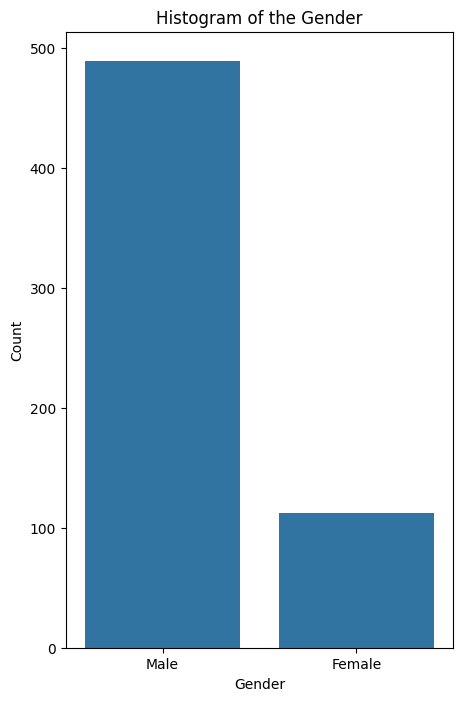

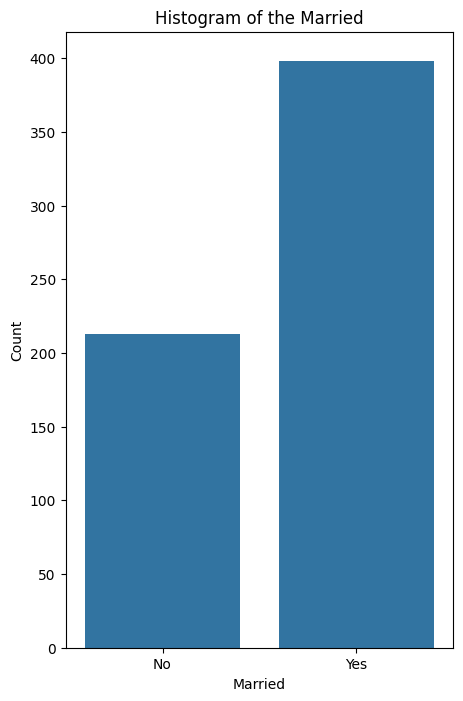

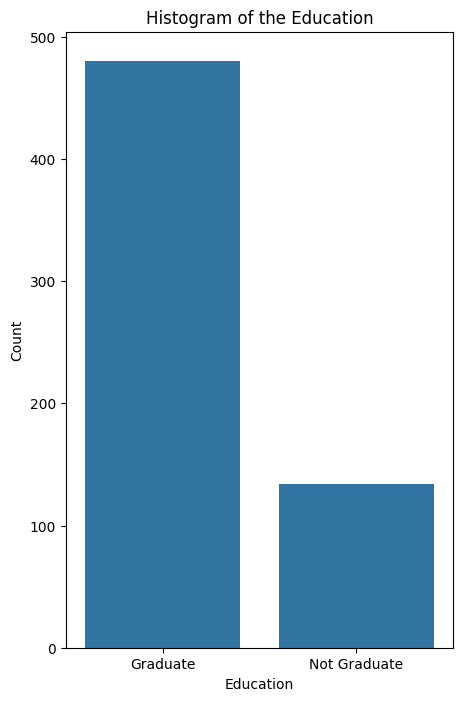

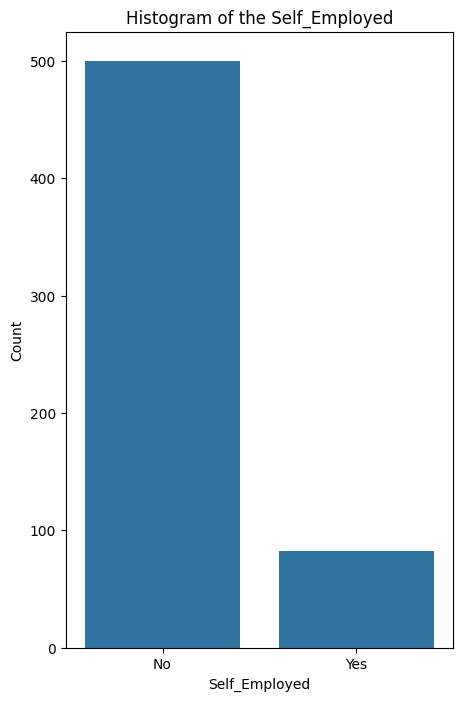

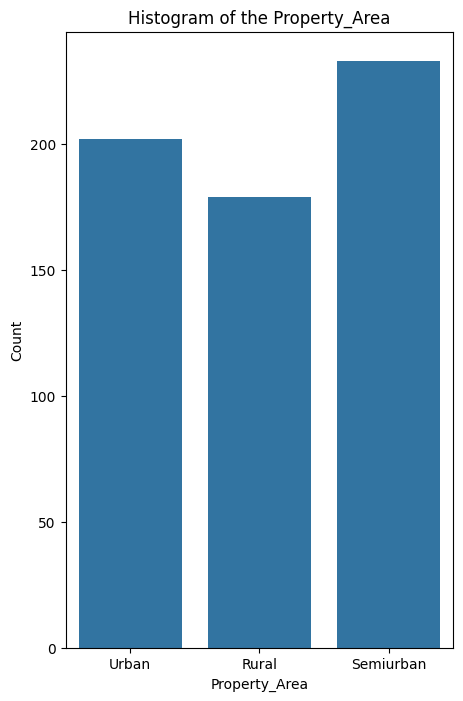

In [ ]:
category_col = ['Gender','Married','Education','Self_Employed','Property_Area']

for column in category_col:
    plt.figure(figsize=(5,8))
    sns.countplot(x= column,data = df)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Histogram of the {column}')
    plt.show()

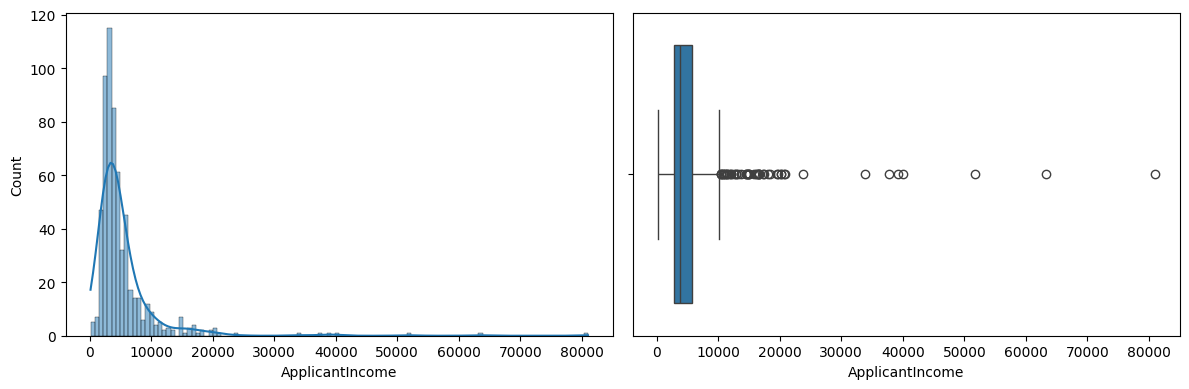

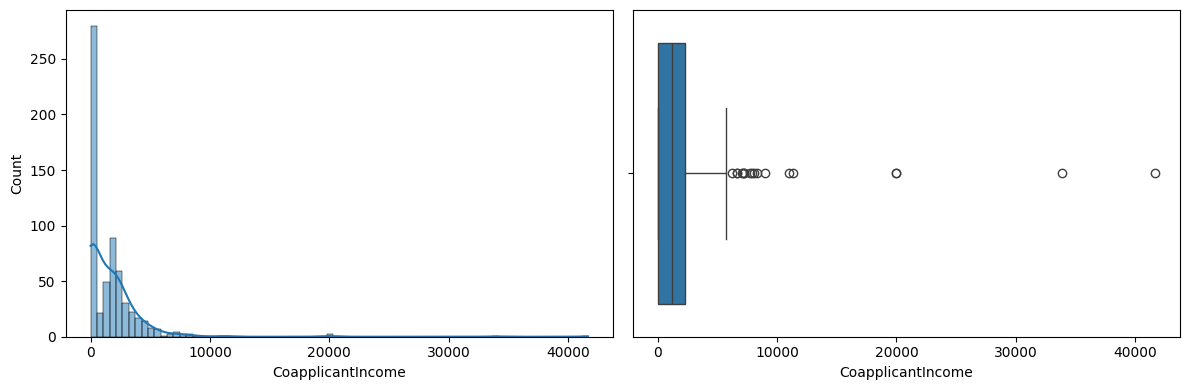

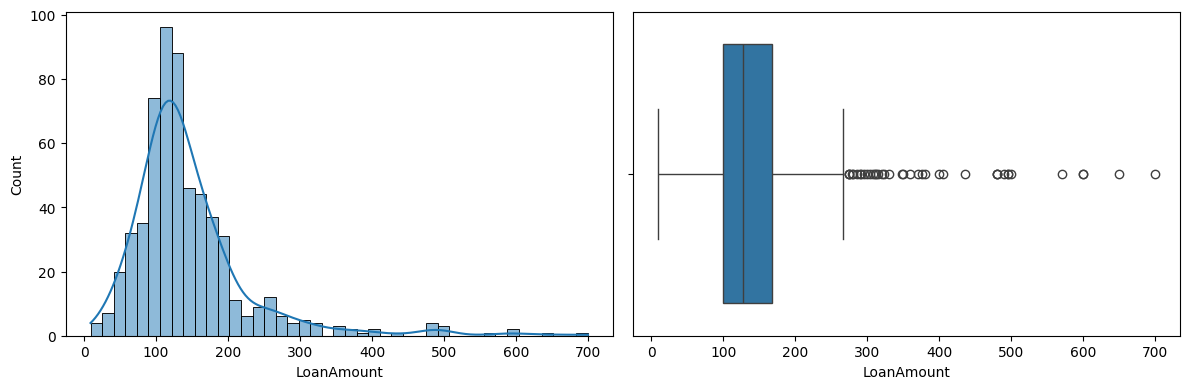

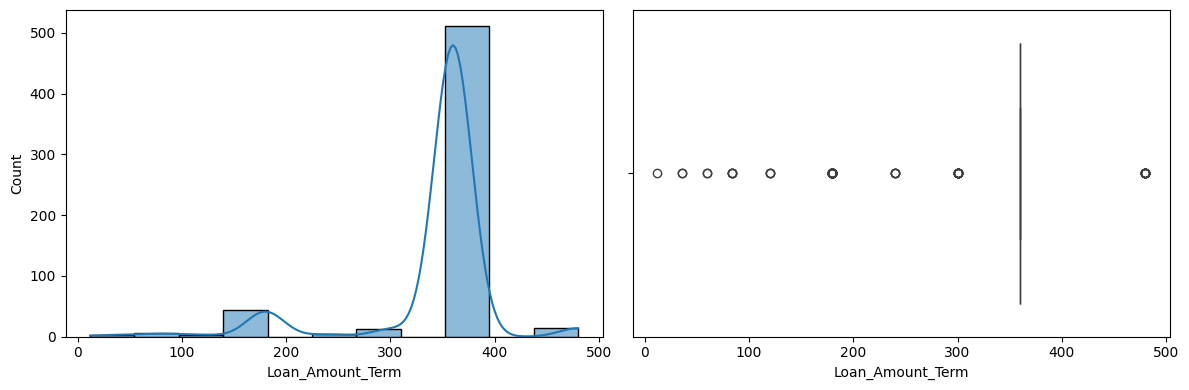

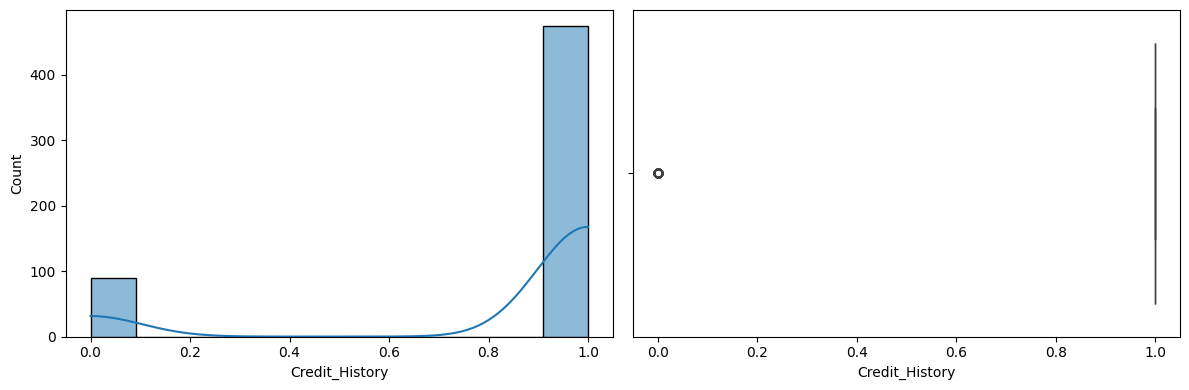

In [ ]:
numeric_vals = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for col in numeric_vals:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
mode_Gender = df['Gender'].mode()
df['Gender'].fillna(mode_Gender[0],inplace=True)

<ipython-input-15-561d305990a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_Gender[0],inplace=True)


In [ ]:
mode_Married = df['Married'].mode()
df['Married'].fillna(mode_Married[0],inplace=True)

<ipython-input-16-e10c89636111>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(mode_Married[0],inplace=True)


In [ ]:
mode_Self_Employed = df['Self_Employed'].mode()
df['Self_Employed'].fillna(mode_Self_Employed[0],inplace=True)

<ipython-input-17-7763d27c96a4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(mode_Self_Employed[0],inplace=True)


In [ ]:
df['Credit_History'].astype('object')

,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
609,1.0
610,1.0
611,1.0
612,1.0


In [ ]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [ ]:
mode_Credit_History = df['Credit_History'].mode()
df['Credit_History'].fillna(mode_Credit_History[0],inplace=True)

<ipython-input-20-cdf22ee8923d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(mode_Credit_History[0],inplace=True)


In [ ]:
mode_Loan_Amount_Term = df['Loan_Amount_Term'].mode()
df['Loan_Amount_Term'].fillna(mode_Loan_Amount_Term[0],inplace=True)

<ipython-input-21-8dfe67341cae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(mode_Loan_Amount_Term[0],inplace=True)


In [ ]:
median_Loan_Amount = df['LoanAmount'].median()
df['LoanAmount'].fillna(median_Loan_Amount,inplace=True)

<ipython-input-22-832046e6abd1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(median_Loan_Amount,inplace=True)


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
ApplicantIncome_out = df['ApplicantIncome']<=50000
CoapplicantIncome_out =df['CoapplicantIncome']<=20000
LoanAmount_out =df['LoanAmount']<=500

In [ ]:
df_no_outliers = df.copy()

df_no_outliers = df[(ApplicantIncome_out) & (CoapplicantIncome_out) & (LoanAmount_out)]

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            605 non-null    object 
 1   Gender             605 non-null    object 
 2   Married            605 non-null    object 
 3   Dependents         605 non-null    int32  
 4   Education          605 non-null    object 
 5   Self_Employed      605 non-null    object 
 6   ApplicantIncome    605 non-null    int64  
 7   CoapplicantIncome  605 non-null    float64
 8   LoanAmount         605 non-null    float64
 9   Loan_Amount_Term   605 non-null    float64
 10  Credit_History     605 non-null    float64
 11  Property_Area      605 non-null    object 
 12  Loan_Status        605 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 63.8+ KB


In [ ]:
df_no_outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
cate_cols = ['Gender','Married','Education','Self_Employed','Property_Area']
df_onehot = df_no_outliers.copy()
for col in cate_cols:
    df_onehot = pd.get_dummies(df_onehot, columns=[col])
print("Encorded \n",df_onehot.head())

Encorded 
     Loan_ID  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0  LP001002           0             5849                0.0       128.0   
1  LP001003           1             4583             1508.0       128.0   
2  LP001005           0             3000                0.0        66.0   
3  LP001006           0             2583             2358.0       120.0   
4  LP001008           0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Loan_Status  Gender_Female  Gender_Male  \
0             360.0             1.0           Y          False         True   
1             360.0             1.0           N          False         True   
2             360.0             1.0           Y          False         True   
3             360.0             1.0           Y          False         True   
4             360.0             1.0           Y          False         True   

   Married_No  Married_Yes  Education_Graduate  Education_Not G

In [ ]:
df_encorded = df_onehot.drop(columns = 'Loan_ID',axis=1)
df_encorded.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,True,False,True,False,True,False,False
2,0,3000,0.0,66.0,360.0,1.0,Y,False,True,False,True,True,False,False,True,False,False,True
3,0,2583,2358.0,120.0,360.0,1.0,Y,False,True,False,True,False,True,True,False,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
cate_cols_LE = ['Gender','Married','Education','Self_Employed','Loan_Status']
df_LE = df_no_outliers.copy()
for col in cate_cols_LE:
    df_LE[col] = LE.fit_transform(df_LE[col])

df_LE = pd.get_dummies(df_LE, columns=['Property_Area'])
df_LE = df_LE.drop(columns = 'Loan_ID',axis=1)
print("Encorded \n",df_LE.head())

Encorded 
    Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Loan_Status  Property_Area_Rural  Property_Area_Semiurban  \
0            1                False      

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
df_encorded['Loan_Status'] = Label_encoder.fit_transform(df_encorded['Loan_Status'])

In [ ]:
df_encorded.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,1,False,True,True,False,True,False,True,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,True,False,True,False,True,False,False
2,0,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,True,False,False,True,False,False,True
3,0,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,False,True,True,False,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,True,False,True,False,False,False,True


In [ ]:
x = df_encorded.drop(columns ='Loan_Status',axis =1).values
y = df_encorded['Loan_Status'].values

In [ ]:
x_LE = df_LE.drop(columns ='Loan_Status',axis =1).values
y_LE = df_LE['Loan_Status'].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train_LE,x_test_LE,y_train_LE,y_test_LE = train_test_split(x_LE,y_LE,test_size = 0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

x_train_scaled_LE = mm.fit_transform(x_train_LE)
x_test_scaled_LE = mm.transform(x_test_LE)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model_LE = LogisticRegression()

In [ ]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
model_LE.fit(x_train_scaled_LE,y_train_LE)

LogisticRegression()

In [ ]:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test)

In [ ]:
y_train_pred_LE = model_LE.predict(x_train_scaled_LE)
y_test_pred_LE = model_LE.predict(x_test_LE)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_accuracy_LE = accuracy_score(y_train_LE,y_train_pred_LE)
test_accuracy_LE = accuracy_score(y_test_LE,y_test_pred_LE)
conf_matrix_LE = confusion_matrix(y_test_LE,y_test_pred_LE)
class_report_LE = classification_report(y_test_LE, y_test_pred_LE)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
conf_matrix = confusion_matrix(y_test,y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print('Train_accuracy :',train_accuracy)
print('Test_accuracy :\n',test_accuracy)
print('Confusion_matrix :\n',conf_matrix)
print('Classification_report :\n',class_report)

print('Train_accuracy :',train_accuracy_LE)
print('Test_accuracy :\n',test_accuracy_LE)
print('Confusion_matrix :\n',conf_matrix_LE)
print('Classification_report :\n',class_report_LE)

Train_accuracy : 0.8140495867768595
Test_accuracy :
 0.3305785123966942
Confusion_matrix :
 [[38  1]
 [80  2]]
Classification_report :
               precision    recall  f1-score   support

           0       0.32      0.97      0.48        39
           1       0.67      0.02      0.05        82

    accuracy                           0.33       121
   macro avg       0.49      0.50      0.27       121
weighted avg       0.56      0.33      0.19       121

Train_accuracy : 0.8099173553719008
Test_accuracy :
 0.6115702479338843
Confusion_matrix :
 [[ 7 29]
 [18 67]]
Classification_report :
               precision    recall  f1-score   support

           0       0.28      0.19      0.23        36
           1       0.70      0.79      0.74        85

    accuracy                           0.61       121
   macro avg       0.49      0.49      0.48       121
weighted avg       0.57      0.61      0.59       121



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier()
model_1.fit(x_train_scaled,y_train)

y_train_pred = model_1.predict(x_train_scaled)
y_test_pred=model_1.predict(x_test_scaled)

train_accuracy_D = accuracy_score(y_train,y_train_pred)
test_accuracy_D = accuracy_score(y_test,y_test_pred)
conf_matrix_D = confusion_matrix(y_test,y_test_pred)
class_report_D = classification_report(y_test, y_test_pred)

print('Train_accuracy :',train_accuracy_D)
print('Test_accuracy :\n',test_accuracy_D)
print('Confusion_matrix :\n',conf_matrix_D)
print('Classification_report :\n',class_report_D)

model_1.fit(x_train,y_train)

y_train_pred = model_1.predict(x_train)
y_test_pred = model_1.predict(x_test)

train_accuracy_DN = accuracy_score(y_train,y_train_pred)
test_accuracy_DN = accuracy_score(y_test,y_test_pred)
conf_matrix_DN = confusion_matrix(y_test,y_test_pred)
class_report_DN = classification_report(y_test, y_test_pred)

print('Train_accuracy :',train_accuracy_DN)
print('Test_accuracy :\n',test_accuracy_DN)
print('Confusion_matrix :\n',conf_matrix_DN)
print('Classification_report :\n',class_report_DN)

Train_accuracy : 1.0
Test_accuracy :
 0.6942148760330579
Confusion_matrix :
 [[25 14]
 [23 59]]
Classification_report :
               precision    recall  f1-score   support

           0       0.52      0.64      0.57        39
           1       0.81      0.72      0.76        82

    accuracy                           0.69       121
   macro avg       0.66      0.68      0.67       121
weighted avg       0.72      0.69      0.70       121

Train_accuracy : 1.0
Test_accuracy :
 0.6942148760330579
Confusion_matrix :
 [[24 15]
 [22 60]]
Classification_report :
               precision    recall  f1-score   support

           0       0.52      0.62      0.56        39
           1       0.80      0.73      0.76        82

    accuracy                           0.69       121
   macro avg       0.66      0.67      0.66       121
weighted avg       0.71      0.69      0.70       121



In [ ]:
!pip install lime
!pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.6 MB/s eta 0:00:00


Generating LIME explanation...


<Figure size 1000x600 with 0 Axes>

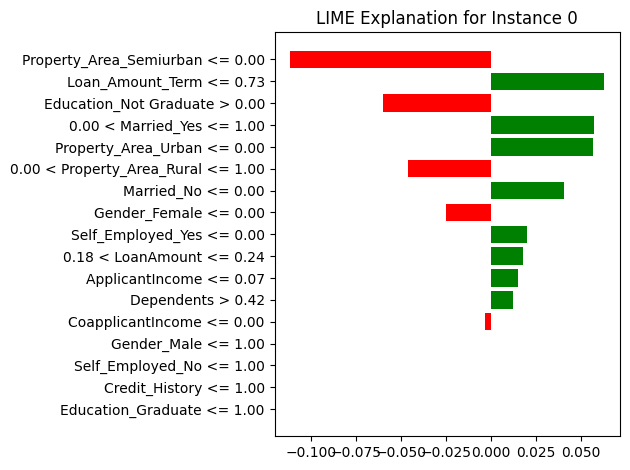


Generating SHAP values and plots...


  0%|          | 0/100 [00:00<?, ?it/s]

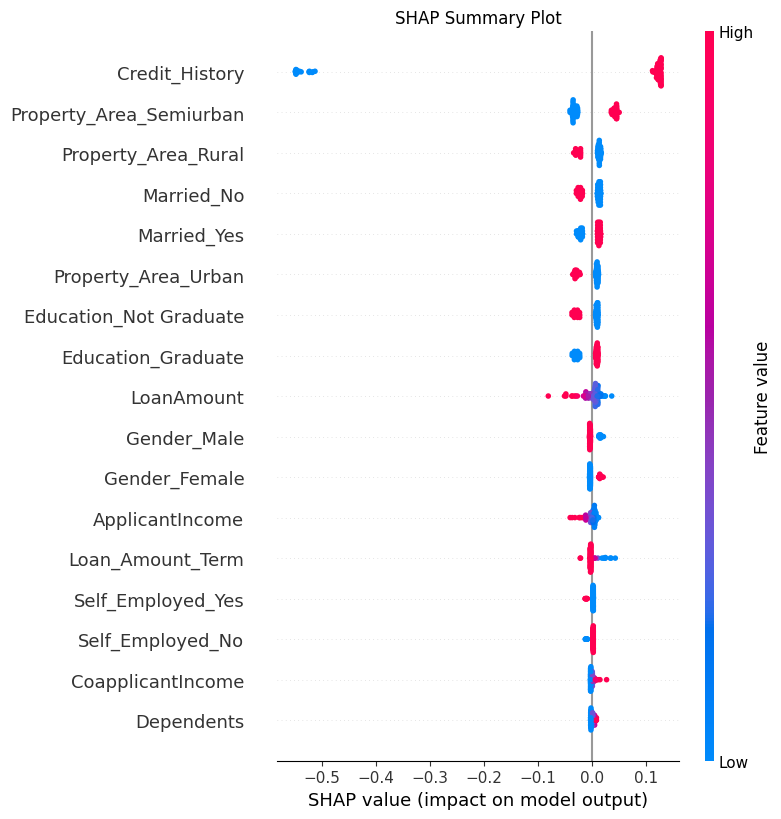

<Figure size 1000x300 with 0 Axes>

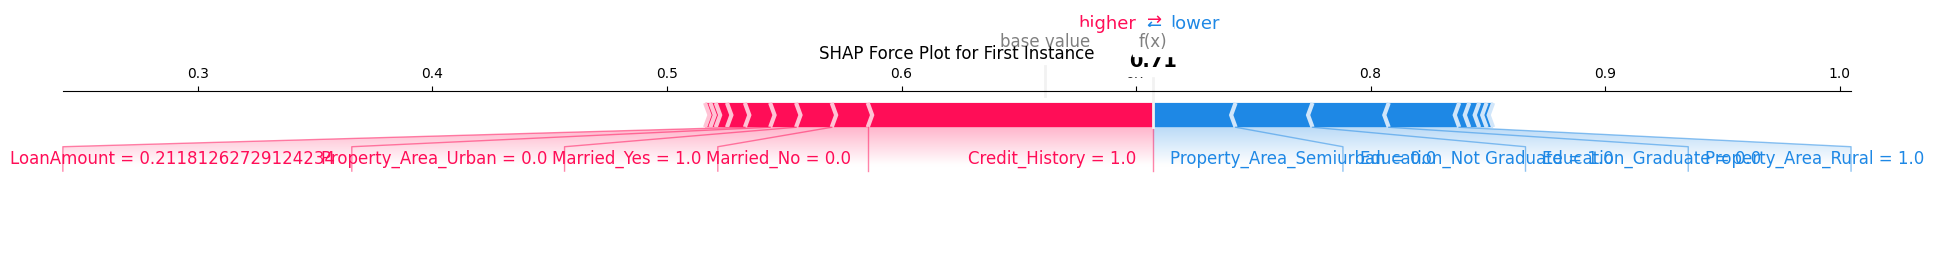

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lime import lime_tabular
import shap
from pdpbox import pdp
from sklearn.preprocessing import LabelEncoder

# LIME Explanation
def explain_with_lime(model, X_train, X_test, feature_names, instance_idx=0):
    """
    Generate LIME explanation for a specific instance
    """
    explainer = lime_tabular.LimeTabularExplainer(
        X_train,
        feature_names=feature_names,
        class_names=['Rejected', 'Approved'],
        mode='classification'
    )

    exp = explainer.explain_instance(
        X_test[instance_idx],
        model.predict_proba,
        num_features=len(feature_names)
    )

    plt.figure(figsize=(10, 6))
    exp.as_pyplot_figure()
    plt.title('LIME Explanation for Instance ' + str(instance_idx))
    plt.tight_layout()
    plt.show()

# SHAP Explanation
def explain_with_shap(model, X_train, X_test, feature_names):
    """
    Generate SHAP values and plots
    """
    background = shap.sample(X_train, 100)
    explainer = shap.KernelExplainer(
        lambda x: model.predict_proba(x)[:, 1],
        background
    )

    sample_size = min(100, X_test.shape[0])
    shap_values = explainer.shap_values(X_test[:sample_size])

    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        shap_values,
        X_test[:sample_size],
        feature_names=feature_names,
        show=False
    )
    plt.title('SHAP Summary Plot')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 3))
    shap.force_plot(
        explainer.expected_value,
        shap_values[0],
        X_test[0],
        feature_names=feature_names,
        matplotlib=True,
        show=False
    )
    plt.title('SHAP Force Plot for First Instance')
    plt.tight_layout()
    plt.show()

def get_feature_names(df_encoded):
    """Get feature names from encoded dataframe"""
    return df_encoded.drop('Loan_Status', axis=1).columns.tolist()

def explain_model(model, df_encoded, X_train_scaled, X_test_scaled):
    """
    Generate all explanations for the model
    """
    feature_names = get_feature_names(df_encoded)

    print("Generating LIME explanation...")
    explain_with_lime(model, X_train_scaled, X_test_scaled, feature_names)

    print("\nGenerating SHAP values and plots...")
    explain_with_shap(model, X_train_scaled, X_test_scaled, feature_names)


explain_model(model, df_encorded, x_train_scaled, x_test_scaled)